## Задача №1: Подгонка кривой температурных данных

Экстремумы температуры на Аляске для каждого месяца, начиная с января, определяются следующим образом (в градусах Цельсия):

| max: | 17  | 19  | 21  | 28  | 33  | 38  | 37 | 37  | 31  | 23  | 19  | 18  |
|------|-----|-----|-----|-----|-----|-----|----|-----|-----|-----|-----|-----|
| min: | -62 | -59 | -56 | -46 | -32 | -18 | -9 | -13 | -25 | -46 | -52 | -58 |

1. Постройте график этих температурных экстремумов.

2. Определите функцию, которая может описывать минимальные и максимальные температуры. **Подсказка:** эта функция должна иметь период 1 год. **Подсказка:** включите смещение по времени.

3. Подгоните эту функцию к данным с помощью **scipy.optimize.curve_fit()**.

4. Постройте график результата. Является ли соответствие обоснованным? Если нет, то почему?

5. Является ли смещение по времени для минимальных и максимальных температур одинаковым в пределах точности подгонки?

In [542]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

max_t = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_t = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1, 13)

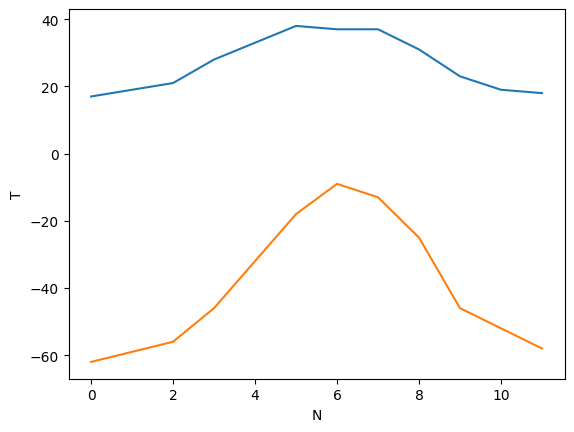

In [543]:
#1

plt.plot(max_t)
plt.plot(min_t)
plt.xlabel("N")
plt.ylabel("T")
plt.show()

#2 
Это функция синуса с периодом 12 месяцев.

Коэффициенты: [10.65821997 -0.90285098 27.55022077]
Отклонения: [ 0.05306376  0.97730143 -1.07383064  0.16480401 -0.50756584  0.68049601
 -1.08057234  1.44690473  0.47361614 -1.57024028 -0.54472101  0.98074406]


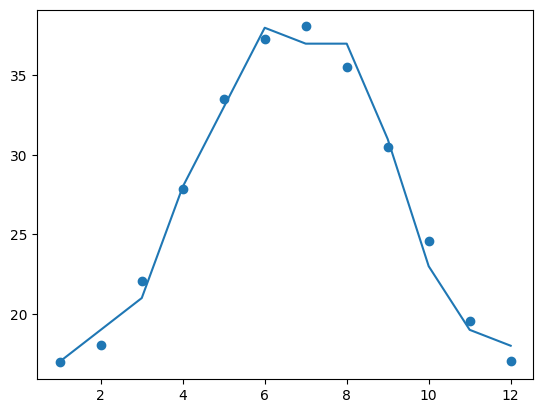

In [544]:
#3 для максимальных
def f1(x, a, b, c):
    return a * np.sin(12 * x + b) + c


params, params_covariance = sp.optimize.curve_fit(
    f1, months, max_t, p0=[1, 2, 3]
)
print("Коэффициенты:",params) 
print("Отклонения:", max_t - f1(months, *params))
plt.plot(months, max_t)
plt.scatter(months, f1(months, *params))
plt.show()

Коэффициенты: [-25.22573696 -10.08455461 -37.88712123]
Отклонения: [-0.3705645   3.49533998 -0.32370741 -2.69817217 -2.76360694 -0.12748778
  3.7590353   2.49286067  0.22023631 -7.09662018  0.26915382  3.14353291]


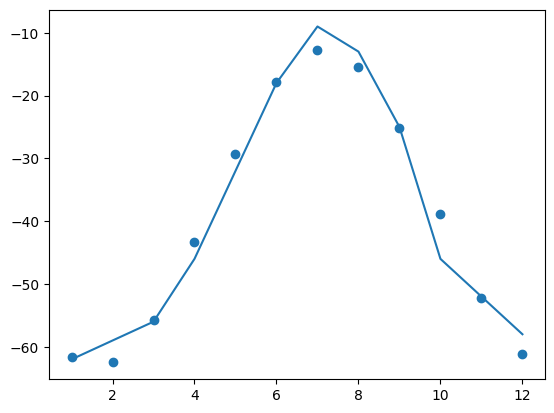

In [545]:
#3 для минимальных
def f2(x, a, b, c):
    return a * np.sin(12 * x + b) + c


params2, params_covariance2 = sp.optimize.curve_fit(
    f2, months, min_t, p0=[1, 2, 3]
)
print("Коэффициенты:", params2)
print("Отклонения:", min_t - f2(months, *params2))
plt.plot(months, min_t)
plt.scatter(months, f2(months, *params2))
plt.show()

#4
График температур ложится на график синуса с небольшой погрешностью, поэтому можно сказать, что соответствие является обоснованным.

#5
Для минимальных температур смещение по времени -10.08455461, при 
Для минимальных температур смещение по времени -0.90285098.
В пределах точности подгонки смещение разное.




## Задача №2: 2-D минимизация  


$f(x, y) = (4-2.1x^{2} + \frac{x^{4}}{3})x^{2} + xy + (4y^{2} - 4)y^{2}$

f(x, y) имеет несколько локальных минимумов. Найдите глобальный минимум (их больше одного, каждый с одинаковым значением целевой функции) и по крайней мере один другой локальный минимум.
А также построить 2D и 3D графики функции.

*Подсказки:*   
1) Переменные могут быть ограничены $-2 < x < 2$, а также  $-1 < y < 1$  
2) **numpy.meshgrid()** и **matplotlib.pyplot.imshow()** могут помочь с визуализацией.  
3) Попробуйте минимизировать с помощью **scipy.optimize.minimize()** с первоначальным предположением $(x, y) = (0, 0)$.   
Находит ли он глобальный минимум или сходится к локальному минимуму? А как насчет других начальных догадок?  
4) Попробуйте минимизировать с помощью **scipy.optimize.differential_evolution()**.


In [546]:
#You can do it!
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [547]:
def f(arg):
    x = arg[0]
    y = arg[1]
    return (4 - 2.1 * x * x + x ** 4 / 3) * x * x + x * y + (4 * y * y - 4) * y * y

def f_xx(x):
    return (4 - 2.1 * x * x + x ** 4 / 3) * x * x + x * x + (4 * x * x - 4) * x * x

size = 1100
n = 2200
x = np.linspace(-size, size + 1, n)
y = np.linspace(-size, size + 1, n)
z = f([x, y])

pmin = np.array([-1000, -1000])
pmax = np.array([1000, 1000])
bounds = np.c_[pmin, pmax]

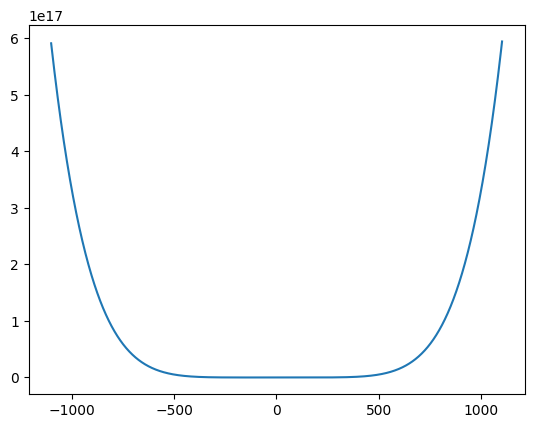

In [548]:
#Построим график 2D 

#plt.imshow(z1)
plt.plot(x, f_xx(x))



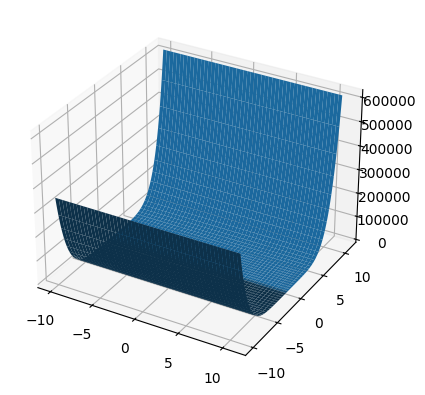

In [549]:
#Построим график 3D

fig = plt.figure()
x, y = np.meshgrid(np.linspace(-10, 10 + 1, 1000), np.linspace(-10, 10 + 1, 1000))
z = f([x.T, y])
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z)
plt.show()


In [550]:
#локальный минимум
x0 = np.array([5, 5])
res_local = sp.optimize.minimize(f, x0=x0, bounds=bounds)
print(res_local.x, f(res_local.x))

#я подставляла разные значения x0 в функцию, и получались разные минимумы => функция находит только локальные минимумы

[ 0.08984202 -0.7126564 ] -1.031628453489877


In [551]:
#глобальный минимум

res_global = sp.optimize.differential_evolution(f, bounds=bounds)
print(res_global.x)

[-0.08984197  0.7126566 ]


## Задача №3:  Подотрезок с максимальной суммой   

Реализуйте функцию find_max_sum_segment, выполняющую поиск подотрезка длины **к** с максимальной суммой в целочисленном массиве **аггау**. Функция должна возвращать максимальное значение суммы. Например, у массива **аггаy** = [5, 3, -6, 1] есть 3 подотрезка длины к = 2 с суммами [8, -3, -5] соответственно, в этом случае функция должна вернуть число 8.

В реализации разрешается создавать объекты размерности два. Запрещается использовать циклы, а также готовую функцию пр.cumsum.

*Подсказка*: Задачу можно решать разными способами. Можно обратить внимание на функции для генерации треугольных матриц в пакете numpy и воспользоваться векторно-арифметическими операциями. Можно попробовать сделать специальную бинарную матрицу и также воспользоваться векторно-арифметическими операциями, включая матричные операции.

In [552]:
#Шаблон решения:
import numpy as np
import typing as tp


def find_max_sum_segment (array: tp.List[int], k: int) -> int:
  n = len(array)
  d = np.array(array)

  #треугольник из единиц размера n*n
  triangle_n = np.tri(n)
  triangle_n = np.rot90(triangle_n, 2)

  #треугольник из единиц размера (n-k)*(n-k)
  triangle_n_k = np.tri(n - k)

  #инвертирование: получился треугольник из нулей размера (n-k)*(n-k)
  triangle_n_k = np.ones(n - k) - triangle_n_k
  triangle_n_k = np.rot90(triangle_n_k, 3)


  #подгоняем размер triangle_n_k до n*n, дозаполняя пространство единицами
  add_vertical = np.ones((k, n - k))
  triangle_n_k = np.vstack([triangle_n_k, add_vertical])
  add_horizontal = np.ones((n, k))
  triangle_n_k = np.hstack([triangle_n_k, add_horizontal])
  triangle_n_k = np.rot90(triangle_n_k, 3)
  
  #делаем маску - в каждой строке k единиц, которые в стоят на k подряд идущих местах, в первой строке начиная с первого элемента, во второй - со второго и тд
  binary = triangle_n * triangle_n_k
  binary = binary[:n - k + 1]

  #надеваем маску на данные
  start = np.array(array * (n - k + 1)).reshape(n - k + 1, n)
  for_sums = start * binary


  #считаем суммы в стораках и возвращаем максимум
  return for_sums.sum(1).max()

print(find_max_sum_segment([2, 3, 5, 7, 8, 1], 3))

20.0


## Задача № 4: Ближайшие соседи

Допустим, вам необходимо разработать автоматический классификатор, который умеет различать котиков от песиков. Как его реализовать? Можно посмотреть на характеристики каждого животного: вес, длина хвостика, объем туловища, а можно посмотреть и на фотографию. Тем самым для животного получится некоторый вектор $x \in \mathbb{R}^{d}$. Давайте сравним этот вектор с другими векторами котиков и песиков, которых мы видели ранее. Если вектор окажется ближе к котикам, то мы скажем, что перед нами котик, иначе песик.

Обычно среди всего множества известных нам котиков и песиков берут $k$ штук, для которых соответствующие им векторы лежат ближе всего к нашему вектору $x$. Эти $k$ штук векторов называются ближайшими соседями. Можете подумать, почему часто плохо брать $k = 1$.

К самой классификации мы перейдем позже, а сейчас давайте закрепим навык поиска ближайших соседей. Реализуйте функцию **find_nearest_points**, выполняющую поиск $k$ ближайших соседей точек из множества $B$ среди точек из множества $A$. На вход функции подаётся  
*  матрица $A$ размерности $n \times d$,

*  матрица в размерности $m \times d$,

*  число $k$ - количество соседей.

В матрице $A$ по строкам записаны $n$ точек из пространства $\mathbb{R}^{d}$,
аналогично описаны $m$ точек в матрице $B$. Функция **find_nearest_points** должна возвращать матрицу $C$ размерности $m \times k$, каждая строка $j $ $(1≤ j ≤ m)$ которой состоит из $k$ индексов $р_{ji}$ $(1 ≤ p_{ji} ≤ n, 1 ≤ i ≤ k)$ ближайших точек из $A$ к точке $B_{j}$, (по евклидовой метрике).

Шаблон решения:



In [553]:
import numpy as np
#import typing as tp

def find_nearest_points (A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
  n = len(A)
  m = len(B)
  d = len(A[0])
  C = np.ndarray((m, k))
  for i in range(m):
    dist = []
    for j in range(n):
      # print(A[j] - B[i])
      # print((A[j] - B[i]) * (A[j] - B[i]))
      # print(np.sum((A[j] - B[i]) * (A[j] - B[i])))
  
      dist.append([np.sqrt(np.sum((A[j] - B[i]) * (A[j] - B[i]))), j + 1])
    
    dist.sort()
    ans = np.array(dist)[:, 1][:k]
    C[i] = ans.copy()

      
  


  return C


Рассмотрим следующий пример:

In [554]:
# >>> A = np.array([ [0, 0],
#                    [1, 0],
#                    [2, 0]])

# >>> B = np.array([ [0, 1],
#                    [2, 1]])

# >>> find_nearest_points (A, B, 2)
# array([[1, 2],
#        [3, 2]])

Для точки (0,1) ближайшей из списка точек K является точка

(0,0), которая имеет индекс 1 (в данной задаче индексация

точек начинается с 1). Второй по расстоянию будет точка

(1,0) с индексом 2, поэтому первая строчка матрицы, которая получена в результате работы функции, равна 1,2

## Задача №5: Матричное перемножение  

Напишите функцию, реализующую матричное умножение. Для этого реализуйте функцию **matrix_multiplication.**

При вычислении разрешается создавать объекты размерности три и **использовать только**:

* простые стандартными поэлементными векторно-арифметическими операциями над numpy.array (поэлементная сумма, поэлементное произведение и т.д.)

* стандартные агрегирующие арифметические операции над numpy.array (например, сумма вдоль оси)

* любые операциями изменения формы массива (например, транспонирование, добавление осей).

**Запрещается пользоваться:**

* циклами

* функциями, реализующими матричное умножение, например, пumpy.dot, операция @, операция умножения в классе numpy.matrix, суммы Эйнштейна и прочие.

* функциями вида map, apply

* функциями вида fromfunction, apply_along_axis  

Использовать библиотеки, которых нет в шаблоне, запрещается.  
Шаблон решения:

In [555]:
import numpy as np
#import typing as tp

def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
  n, m = A.shape
  k, l = B.shape
  if m != k:
    return "Error. Change the sizes or matrixes."
  

  B = B.T
  
  help1, help2 = np.meshgrid(A, B)
  help1 = help1.reshape((k * l, n, m))
  help1 = np.transpose(help1, (1, 0, 2))
  help1 = help1.reshape((k * l * n, m))
  help2 = help2.T
  help2 = help2.reshape((n * k * l, m))


  C = (help1 * help2).sum(1)
  C = C.reshape((n * m, l))[::m]


  return C


print(matrix_multiplication(np.array([[5, 6, 7], [8, 9, 10]]), np.array([[1, 2, 3, 4], [11, 12, 13, 14], [15, 16, 17, 18]])))
print(matrix_multiplication(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]), np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])))


[[176 194 212 230]
 [257 284 311 338]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Задача №6: Упражнение по обработке изображений - нерасплавленные зерна в стекле

1) Откройте файл изображения MV_HFV_012.jpg и отобразите его. Просмотрите ключевые аргументы в строке документации imshow, чтобы отобразить изображение с «правильной» ориентацией (начало координат в нижнем левом углу, а не в верхнем левом углу, как для стандартных массивов).

2) Это изображение сканирующей элементной микроскопии показывает образец стекла (светло-серая матрица) с несколькими пузырьками (на черном) и нерасплавленными песчинками (темно-серыми). Мы хотим определить долю образца, покрытую этими тремя фазами, и оценить типичный размер песчинок и пузырьков, их размеры и т. д.

3) Обрежьте изображение, чтобы удалить нижнюю панель с информацией об измерениях.

4) Слегка отфильтруйте изображение с помощью медианного фильтра, чтобы уточнить его гистограмму. Проверьте, как изменится гистограмма.

5) Используя гистограмму отфильтрованного изображения, определите пороговые значения, которые позволяют определять маски для пикселей песка, пикселей стекла и пикселей пузырьков.

6) Покажите изображение, на котором три фазы окрашены тремя разными цветами.

7) Используйте математическую морфологию для очистки различных фаз.

8) Присвойте метки всем пузырькам и песчинкам и удалите из маски песка песчинки, которые меньше 10 пикселей. Для этого используйте ndimage.sum или np.bincount для вычисления размеров песчинок.

9) Вычислите средний размер пузырьков.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import skimage as ski

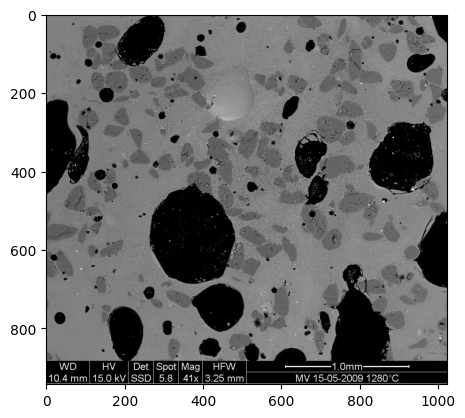

In [3]:
#показ изображения обычным способом
dat = plt.imread('HW3/data/MV_HFV_012.jpg')
plt.imshow(dat, cmap='gray')

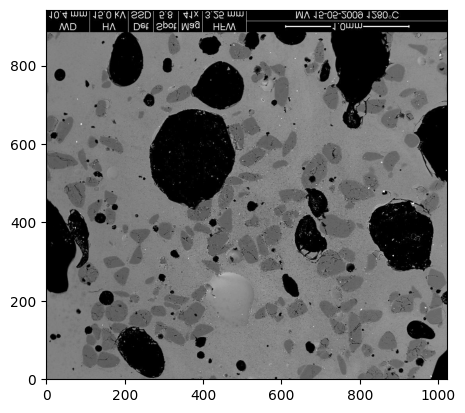

In [4]:
#с началом координат в левом нижнем углу
dat = plt.imread('HW3/data/MV_HFV_012.jpg')
plt.imshow(dat, origin='lower', cmap='gray')

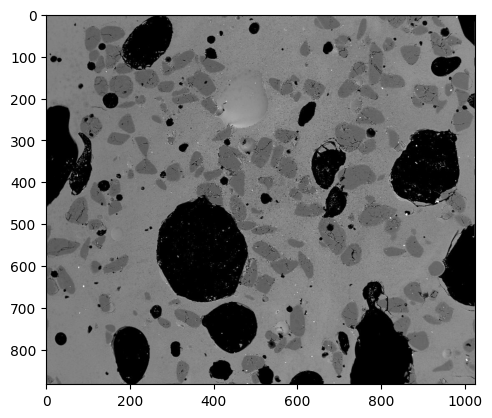

In [5]:
#обрезание изображения
dat = plt.imread('HW3/data/MV_HFV_012.jpg')
dat = dat[:-60, :]
plt.imshow(dat,  cmap='gray')

(array([[237.,   8.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [256.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  14007.7,  28015.4,  42023.1,  56030.8,  70038.5,
         84046.2,  98053.9, 112061.6, 126069.3, 140077. ]),
 <a list of 2 BarContainer objects>)

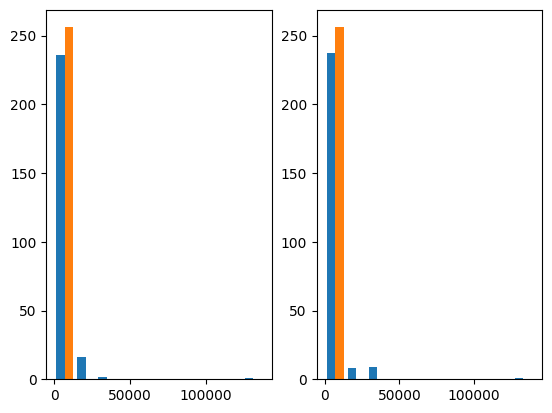

In [8]:
#фильтрование и гистограмма

# plt.subplot(1, 4, 1)
# plt.title("Image 1")
# plt.imshow(dat,  cmap='gray')

# plt.subplot(1, 4, 2)
# plt.title("Histogram 1")
# hist1 = plt.hist(ski.exposure.histogram(dat))



# filtdat = sp.ndimage.median_filter(dat, size=(7,7))
# #median = sp.ndimage.median_filter(dat, size=10)
# plt.subplot(1, 4, 3)
# plt.title("Image 2")
# plt.imshow(filtdat,  cmap='gray')

# plt.subplot(1, 4, 4)
# plt.title("Histogram 2")
# hist2 = plt.hist(ski.exposure.histogram(filtdat))

# print(hist1)
# print(hist2)


filtdat = sp.ndimage.median_filter(dat, size=(7,7))
hi_dat = np.histogram(dat, bins=np.arange(256))
hi_filtdat = np.histogram(filtdat, bins=np.arange(256))
plt.subplot(1, 2, 1)
plt.hist(hi_dat)
plt.subplot(1, 2, 2)
plt.hist(hi_filtdat)

Выводы: 
1. При увеличении рассматриваемой области (size) в median_filter изображение бледнеет
2. Пороговые значения: для пикселей стекла - 0, песка - 100, пузырьков - 125.

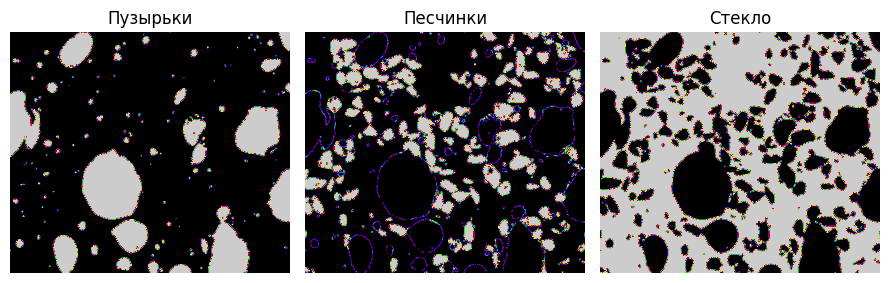

In [69]:
# bubbles < sand < glass

for_sand = 80
for_glass_down = 110
for_glass_up = 112
for_bubbles = 0
for_up = 200


image = filtdat.copy()

sand_boarder = np.ones((image.shape)) * for_sand
glass_boarder_down = np.ones((image.shape)) * for_glass_down
glass_boarder_up = np.ones((image.shape)) * for_glass_up
bubbles_boarder = np.ones((image.shape)) * for_bubbles
up_boarder = np.ones((image.shape)) * for_up

a = (image >= bubbles_boarder) * (image < sand_boarder)
bubbles = ski.measure.label(a)

a = (image >= sand_boarder) * (image < glass_boarder_down)
sand = ski.measure.label(a)

a = (image >= glass_boarder_up) * (image < up_boarder)
glass = ski.measure.label(a)

bubbles = (bubbles > 0).astype(int)
sand = (sand > 0).astype(int)
glass = (glass > 0).astype(int)


def picture():  
    global bubbles, sand, glass


    plt.figure(figsize=(9, 3.5))

    plt.subplot(131)
    plt.title("Пузырьки")
    plt.imshow(bubbles, cmap="nipy_spectral")
    plt.axis("off")

    plt.subplot(132)
    plt.imshow(sand, cmap="nipy_spectral")
    plt.title("Песчинки")
    plt.axis("off")

    plt.subplot(133)
    plt.imshow(glass, cmap="nipy_spectral")
    plt.title("Стекло")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

picture()


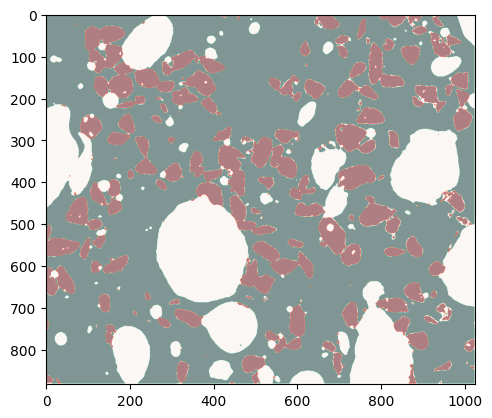

In [102]:
#изображение, на котором три фазы окрашены тремя разными цветами

plt.plot()

plt.imshow(sand, cmap="Reds")
plt.imshow(bubbles, cmap="Blues", alpha=0.3)
plt.imshow(glass, cmap="Greens", alpha=0.3)
plt.show()

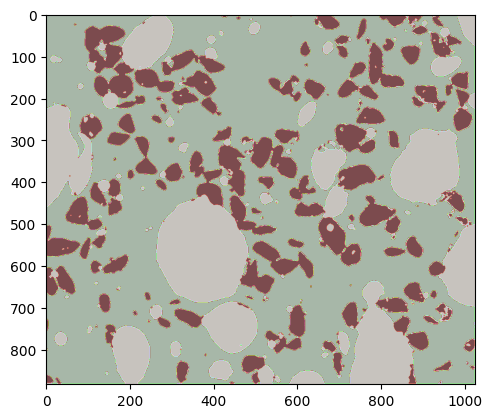

In [103]:
#математическая морфология
bubbles = sp.ndimage.binary_closing(sp.ndimage.binary_opening(bubbles))
sand = sp.ndimage.binary_opening(sand)
sand = sp.ndimage.binary_closing(sand)
glass =  sp.ndimage.binary_opening(glass)
glass =  sp.ndimage.binary_closing(glass)

plt.plot()

plt.imshow(sand, cmap="Reds")
plt.imshow(bubbles, cmap="nipy_spectral", alpha=0.3)
plt.imshow(glass, cmap="Greens", alpha=0.3)
plt.show()

In [107]:
#8 грузится слишком долго


distance = sp.ndimage.distance_transform_edt(bubbles)
peak_idx = ski.feature.peak_local_max(
    distance, footprint=np.ones((3, 3)), labels=bubbles
)
peak_mask = np.zeros_like(distance, dtype=bool)
peak_mask[tuple(peak_idx.T)] = True
markers = ski.morphology.label(peak_mask)
print(markers)

markers[~bubbles] = -1



labels_rw = ski.segmentation.random_walker(bubbles, markers)


plt.plot()
plt.imshow(markers, cmap="Blues", alpha=0.3)
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


KeyboardInterrupt: 

Подсказка к пункту 7: